![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [48]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
bikes.season.describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

Cuando se analiza la variable de respuesta con respecto a season, se puede ver que en la temporada 3 se presenta un máximo de alquiler de bicicletas, mientras que en la temporada 1 tenemos el mínimo de alquiler de bicicletas. Cuando se observa únicamente la variable 'season', se puede observar que los datos tienen una concentración alrededor del centro (entre la temporada 2 y 3).

In [8]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [10]:
bikes.hour.describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

Cuando se analiza la variable 'hour' con respecto a la variable de respuesta, podemos encontrar que la hora con mayor registro promedio de alquiler de bicicletas es las 17 horas. Las horas de mayores requerimientos en el alquiler de bicicletas son las 8 horas y desde las 16 a las 19 horas, lo que sugiere un alto tráfico en las horas de la tarde. 
Cuando miramos únicamente la variable 'hour' encontramos una concentración de los datos al medio día, y una distribución aparentemente normalizada.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

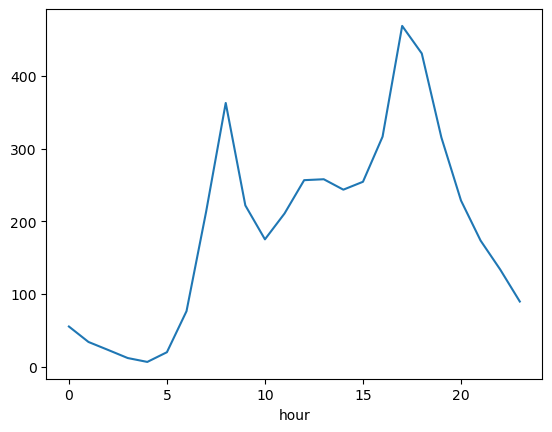

In [11]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

In [18]:
summary = pd.DataFrame(bikes.groupby(['season','hour']).total.mean())

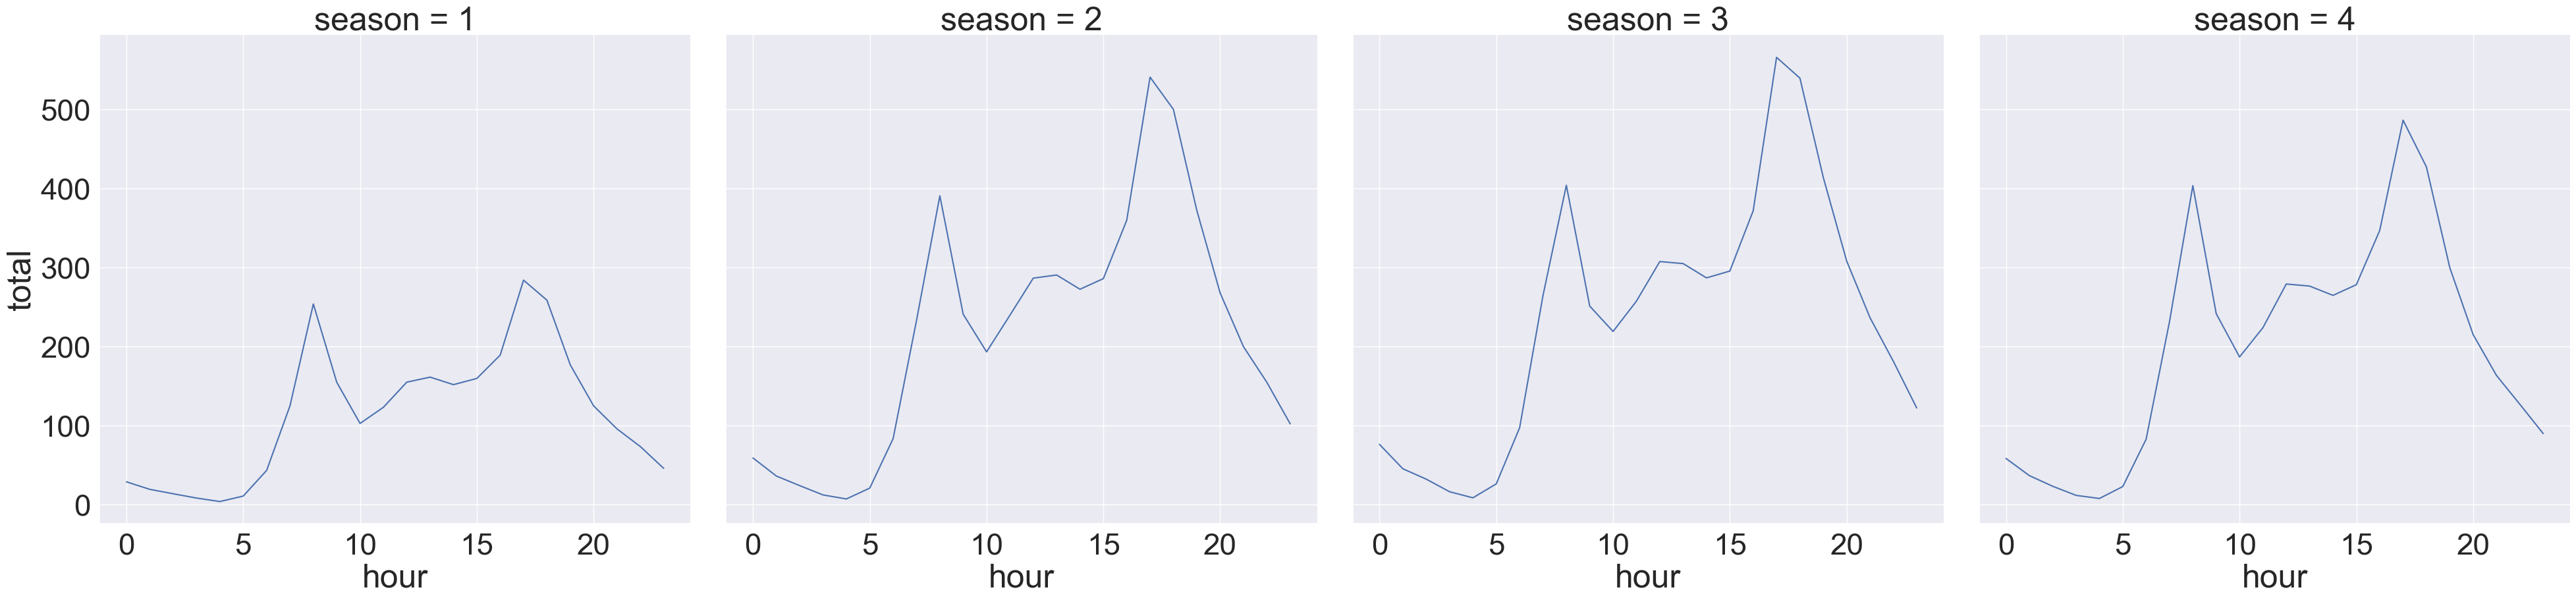

In [33]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
sns.set(font_scale=3)
sns.relplot(data=summary, x='hour', y='total', col='season', kind='line', height=10)

Cuando se evalúan cada una de las temporadas, se puede observar el mayor volumen de alquiler de ciclas en la temporada 3, mientras que en la temporada 1, existe un volumen más bajo. En todas las temporadas, parece haber dos picos de alquiler de bicicletas a las 8 horas y a las 17 horas, marcando una tendencia de usuarios en términos de las horas sin importar la temporada.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [37]:
def pareto_entry(_col,_df):
    cuenta = []
    unicos = []
    porcentaje = []
    for i in list(_df[_col].unique()):
        tempy = pd.DataFrame(_df[_col])
        cuenta.append(tempy[tempy[_col]==i].count()[0])
        unicos.append(i)
        porcentaje.append(round(tempy[tempy[_col]==i].count()[0]/len(_df),3)*100)
    
    pareto_df = pd.DataFrame(unicos, columns=[_col])
    pareto_df['Count'] = cuenta
    pareto_df['Percentage'] = porcentaje
    pareto_df = pareto_df.sort_values(by=['Count'], ascending=False)
    pareto_df['Cum_Percentage'] = round(100*(pareto_df['Count'].cumsum()/pareto_df['Count'].sum()),1)
    
    return pareto_df

def crear_calidad(_df):
    completitud = []
    for i in list(_df.columns):
        vacios = _df[(_df[i]=="")|(_df[i].isna())]
        count_vacios = vacios[i].count()
        medida = round((1-(count_vacios/len(_df)))*100)
        completitud.append([i,medida])
    
    calidad_df = pd.DataFrame(completitud, columns = ['Columna','Completitud de Col(%)'])
    unicidad=[]
    distintivo=[]
    type_col = []
    Moda= []
    for j in list(_df.columns):
        unico = len(_df[_df[j].duplicated()==False])
        temp_df = _df[_df[j].duplicated()==True]
        distinto = len(temp_df[j].unique())
        unicidad.append(unico-distinto)
        distintivo.append(distinto)
        type_col.append(_df[j].dtypes)
        Moda.append(_df[j].mode()[0])
    
    calidad_df['# Unicos']=unicidad
    calidad_df['# Distintos']=distintivo
    calidad_df['Tipo de Columna']=type_col
    calidad_df['Moda']=Moda
    
    return calidad_df

Algunas funciones para crear variables dummies.

In [70]:
bikes_sum = bikes[['hour','season','total']]
bikes_sum.head()

,hour,season,total
datetime,,,
2011-01-01 00:00:00,0,1,16
2011-01-01 01:00:00,1,1,40
2011-01-01 02:00:00,2,1,32
2011-01-01 03:00:00,3,1,13
2011-01-01 04:00:00,4,1,1


In [71]:
dict_season = {1:'Invierno',2:'Primavera',3:'Verano',4:'Otoño'}
bikes_sum.season = bikes_sum.season.replace(dict_season)

Creamos la variable dummie de 'season'.

In [72]:
desc_cat = crear_calidad(bikes_sum)
desc_cat = desc_cat[desc_cat['Tipo de Columna']=='object']
df_cat = bikes_sum[desc_cat.Columna.unique()]

todas_dummies = []
for i in list(df_cat.columns):
    x = pd.get_dummies(df_cat[i])
    x = x[pareto_entry(i,df_cat)[i].unique()]
    x = x.iloc[:,:-1]
    column_index = []
    for j in list(x.columns):
        column_index.append((i,j))
    column_tuple = list(column_index)
    y = pd.DataFrame(x.values,index=x.index,columns=column_tuple)
    todas_dummies.append(y)

df_dummies = pd.concat([i for i in todas_dummies], axis=1)

desc_con = crear_calidad(bikes_sum)
desc_con = desc_con[desc_con['Tipo de Columna']=='int64']
df_train_con = bikes_sum[desc_con.Columna.unique()]
#Unimos las columnas dummies a las columnas numericas
bikes_sum = df_dummies.join(df_train_con,how="inner")

In [73]:
bikes_sum.head()

,"(season, Otoño)","(season, Primavera)","(season, Verano)",hour,total
datetime,,,,,
2011-01-01 00:00:00,0,0,0,0,16
2011-01-01 01:00:00,0,0,0,1,40
2011-01-01 02:00:00,0,0,0,2,32
2011-01-01 03:00:00,0,0,0,3,13
2011-01-01 04:00:00,0,0,0,4,1


In [52]:
from sklearn.model_selection import train_test_split

yTotal = bikes_sum.pop('total').to_numpy()
XTotal = bikes_sum.to_numpy()

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

In [53]:
# Celda 3
regLin = LinearRegression()
regLin.fit(XTrain, yTrain)

LinearRegression()

In [66]:
regLin.coef_

array([ 87.2473903 , 100.90776793, 119.01866421,  10.62873885])

In [67]:
regLin.intercept_

-9.563071266089281

In [56]:
prediccionRegL = regLin.predict(XTest)
MSEregL = np.average(np.square(prediccionRegL-yTest))
print(f'MSE regresión por Regresión Lineal: {MSEregL}')

MSE regresión por Regresión Lineal: 25644.421108938277


Con estos coeficientes se tiene la siguiente interpretación: 
1. En caso de que la estación sea otoño, se verá un aumento de 87.2 bicicletas rentadas. En caso de ser primavera el aumento será de 100.9, en verano de 119, y en Invierno se verá un incremento igual al intercepto, que en este caso es de -9.56.
2. Se tiene que, ante un aumento de una unidad en la hora, se aumentará el número de bicicletas rentadas en 10.6.

Este modelo presenta varias limitaciones. En primera instancia, en términos de horas, estamos atribuyendo un mayor número de ciclas rentadas a las horas más avanzadas del día, lo que no es siempre es cierto que se visualizó en los gráficos de línea. Segundo, si bien en la temporada de invierno se registran menores alquileres de bicicletas, sería impreciso darle un valor de incremento negativo a esta variable predictora, dado que una interpretación de este modelo es que para la hora 0 en invierno, tendríamos un alquiler de bicicletas negativo, lo cual es imposible.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [83]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [74]:
X= bikes_sum.drop(['total'], axis=1)
y= bikes_sum['total']

In [80]:
j, split, gain = best_split(X, y)
j, split, gain

(3, 8.0, 18268.811823533004)

In [81]:
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [82]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [127]:
tree_grow(X, y, level=0, min_gain=0.001, max_depth=3,num_pct=10)

{'y_pred': 1,
 'y_prob': 0.5,
 'level': 0,
 'split': [26, 2980.6923531436364],
 'n_samples': 6000,
 'gain': 0.0348732856787054,
 'sl': {'y_pred': 0,
  'y_prob': 0.35544155368266767,
  'level': 1,
  'split': [21, 920.0909090909092],
  'n_samples': 2727,
  'gain': 0.008693191616418905,
  'sl': {'y_pred': 0,
   'y_prob': 0.4052964881980426,
   'level': 2,
   'split': [25, 3572.437025628182],
   'n_samples': 1735,
   'gain': 0.010920047130314081,
   'sl': {'y_pred': 0,
    'y_prob': 0.3080568720379147,
    'level': 3,
    'split': -1,
    'n_samples': 631,
    'gain': 0.01313875257134478},
   'sr': {'y_pred': 0,
    'y_prob': 0.46112115732368897,
    'level': 3,
    'split': -1,
    'n_samples': 1104,
    'gain': 0.006831363870773988}},
  'sr': {'y_pred': 0,
   'y_prob': 0.2686116700201207,
   'level': 2,
   'split': [16, 1.0],
   'n_samples': 992,
   'gain': 0.014948961407816874,
   'sl': {'y_pred': 0,
    'y_prob': 0.2192513368983957,
    'level': 3,
    'split': -1,
    'n_samples': 746

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [120]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 13)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    regTree = DecisionTreeRegressor(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(regTree, X, y, cv=10).mean())

In [121]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.06599888755874952, 12)

In [115]:
# Celda 5
regTree = DecisionTreeRegressor()
regTree.fit(XTrain, yTrain)

DecisionTreeRegressor()

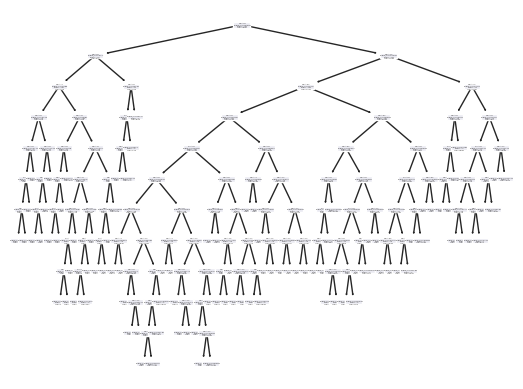

In [116]:
from sklearn.tree import plot_tree
plot_tree(regTree)
plt.show()

In [88]:
prediccionTree = regTree.predict(XTest)
MSEtree = np.average(np.square(prediccionTree-yTest))
print(f'MSE regresión por Regresión Lineal: {MSEtree}')

MSE regresión por Regresión Lineal: 13395.201994797595


Comparando los MSE de los modelos de regresión lineal y el del árbol de decisión calibrado, se puede ver una diferencia significativa entre los dos modelos, ***teniendo mejor desempeño en modelo de árbol de decisión***.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [123]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [124]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [125]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [134]:
# Celda 6
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)

clfTree = DecisionTreeClassifier(random_state = 123)
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [137]:
from sklearn.metrics import accuracy_score, f1_score

prediccionesLog=clfRegLog.predict(X_test)
prediccionesTree=clfTree.predict(X_test)

accuracy_log = accuracy_score(y_test, prediccionesLog)
accuracy_tree = accuracy_score(y_test, prediccionesTree)

f1_log = f1_score(y_test, prediccionesLog)
f1_tree = f1_score(y_test, prediccionesTree)

print("Accuracy Regresión Logística: {:.2f}".format(accuracy_log))
print("F1 score Regresión Logística: {:.2f}".format(f1_log))
print("Accuracy Árbol de Decisión: {:.2f}".format(accuracy_tree))
print("F1 score Árbol de Decisión: {:.2f}".format(f1_tree))

Accuracy Regresión Logística: 0.62
F1 score Regresión Logística: 0.61
Accuracy Árbol de Decisión: 0.54
F1 score Árbol de Decisión: 0.54


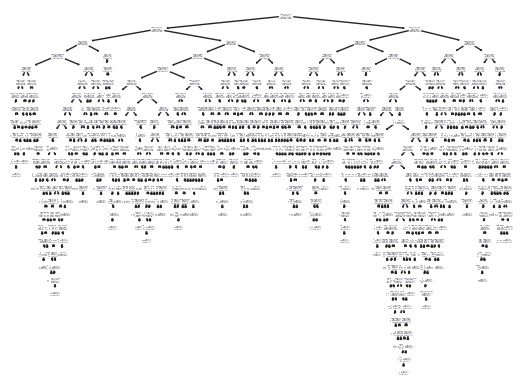

In [138]:
plot_tree(clfTree)
plt.show()

En este caso, el modelo con mejor desempeño es el de regresión Logística, dado que obtiene un accuracy y un F1 score más alto que el arbol de clasificación.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [142]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 28)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clfTree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clfTree, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

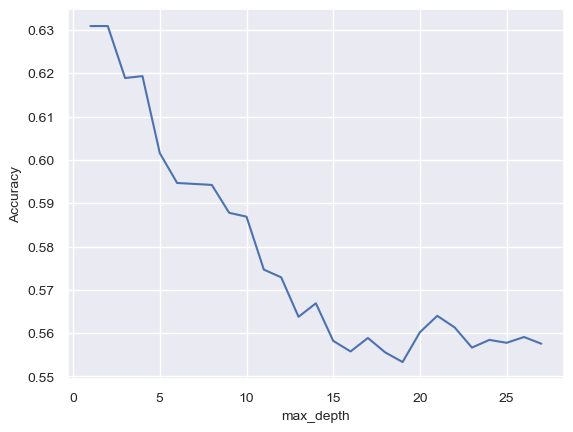

In [145]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [146]:
# Escenario 1
from sklearn.ensemble import BaggingClassifier
clfBag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [151]:
from sklearn import metrics
clfBag.fit(X_train, y_train)
y_pred = clfBag.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6573333333333333, 0.6573333333333333)

In [149]:
# Escenario 2
from sklearn.ensemble import BaggingClassifier
clfBag2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=8), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [152]:
clfBag2.fit(X_train, y_train)
y_pred_2 = clfBag2.predict(X_test)
metrics.f1_score(y_pred_2, y_test), metrics.accuracy_score(y_pred_2, y_test)

(0.6560636182902585, 0.654)

In [153]:
#Escenario 3
clfBag3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [154]:
clfBag3.fit(X_train, y_train)
y_pred_3 = clfBag3.predict(X_test)
metrics.f1_score(y_pred_3, y_test), metrics.accuracy_score(y_pred_3, y_test)

(0.6135135135135135, 0.6186666666666667)

Para este caso, el escenario con un modelo base de árbol de decisión con una profundidad máxima de 5 niveles.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [155]:
# Escenario 1
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clfBag.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clfBag.n_estimators))

for i in range(clfBag.n_estimators):
    oob_sample = ~clfBag.estimators_samples_[i]
    y_pred_ = clfBag.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clfBag.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6494915254237288, 0.6553333333333333)

In [156]:
# Escenario 2
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clfBag2.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clfBag2.n_estimators))

for i in range(clfBag2.n_estimators):
    oob_sample = ~clfBag2.estimators_samples_[i]
    y_pred_ = clfBag2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clfBag2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6563342318059299, 0.66)

In [157]:
# Escenario 3
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clfBag3.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clfBag3.n_estimators))

for i in range(clfBag3.n_estimators):
    oob_sample = ~clfBag3.estimators_samples_[i]
    y_pred_ = clfBag3.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clfBag3.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.613099257258609, 0.618)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Conlusiones

Los modelos de ensamblaje muestran una mejora en desempeño con respecto a los modelos tradicionales de árbol y regresión logística. 

Parece que entre los modelos de ensamblaje tipo Bagging, para este set de datos, el clasificador base de árbol de decisión con el hiperparámetro de **min_samples_leaf** igual a 8 tiene un mejor desempeño que otros modelos base. Esto puede significar, que para este set de datos, los árboles de decisión parecen ser más aptos para este método de ensamblaje, y que además, este hiperparámetro calibra mejor el modelo que la profundidad máxima.

Por otro lado, la metodología de votación ponderada no registra una mejora sustancial en el desempeño de los métodos bagging por votación mayoritaria.